# Descarga de datos

En este pequeño notebook se intenta recopilar procedimientos para poder descargar las imgaenes de diferentes instrumentos. EL primero que se quiere estudiar es el SDO.

## Solar dynamics Observatory 

Es una misión espacial que estudia la actividad solar a traves de la medición de diferentes características. El objetivo principal de este proyecto es estudiar por qué y como cambia el campo magnético y a partir de análisis poder deducir o predecir como se comporta el clima espacial. Los Objetivos principales de esta misión son:

    + ¿Qué mecanismos llevan a un ciclo solar periódico de 11 años ?
    + ¿Cómo evoluciona el campo magnético a través de las regiones acgivas en la superficie solar ?
    + ¿Cómo es el proceso de reconección magnética en grandes y pequeñas escalas para dar la topología encontrada en el sol?
    + Analizar la irradiancia en todo el espectro electromagnético para poder encontrar regularidades en comportamientos del campo magnético
    + ¿Cuál es la configuración de campo magnético cuando se producen flares, CMEs, erupciones?
    + Se puede determinar la estructura y dinámica del viento solar cerca de la Tierra a partir de la configuración del campo magnético y la estructura atmosférica cerca de la superficie solar?
    + ¿Es posible predecir cambios climaticos en la tierra debidos a la actividad solar?

__[Solar Dynamics Observatory](https://sdo.gsfc.nasa.gov/mission/science.php)__

El SDO contiene instrumentos que proveen observaciones que permiten entender la dinámica solar y la evolución del entorno terrestre. Estos instrumentos pueden medir lo siguiente:

    1.Medida del espectro de irradiancia en el ultravioleta a una rápida cadencia
    2. Medida de efecto Doppler en el disco solar
    3. Medidas de alta resolución de campo magnético longitudinal y vectorial sobre el disco visible
    4. Imágenes de la cromosfera y la corona a varias temperaturas de cadencia rápida
  


## Instrumentos

El SDO tiene a bordo tres experimentos científicos:


+ HMI (Helioseismic and Magnetic Imager)

Es un instrumento designado para estudiar las oscilaciones de campo magnético en la superficie solar (fotosfera). Toma un Terabyte de datos al día. Observa el disco solar  a $6173$ $\dot{A}$ con una resolución de 1 arcosegundo.
<img src="HMI.png">
Provee lso siguientes tipos de datos

   1. dopplergramas (mapas de la velocidad supreficial del sol)
   2. Continuum filtergrams (Fotografías de la fotosfera solar)
   3. Magnetogramas (mapeos de los campo magnéticos fotosfericos)

# AIA

In [122]:
from astropy.io import fits
import sunpy.map
import matplotlib.pyplot as plt
from sunpy.net import vso
import numpy as np 
client = vso.VSOClient()
import os
%matplotlib inline

In [187]:
qr=client.query_legacy(tstart='2018/07/23 00:00:00', tend='2018/07/23 00:01:00', instrument='aia',min_wave='171',max_wave='171',unit_wave='Angstrom')
qr

Start Time [1],End Time [1],Source,Instrument,Type,Wavelength [2]
,,,,,Angstrom
str19,str19,str3,str3,str8,float64
2018-07-23 00:00:09,2018-07-23 00:00:10,SDO,AIA,FULLDISK,171.0 .. 171.0
2018-07-23 00:00:21,2018-07-23 00:00:22,SDO,AIA,FULLDISK,171.0 .. 171.0
2018-07-23 00:00:33,2018-07-23 00:00:34,SDO,AIA,FULLDISK,171.0 .. 171.0
2018-07-23 00:00:45,2018-07-23 00:00:46,SDO,AIA,FULLDISK,171.0 .. 171.0
2018-07-23 00:00:57,2018-07-23 00:00:58,SDO,AIA,FULLDISK,171.0 .. 171.0


In [190]:
Download = True
#if os.path.isfile("names.txt") == False and Descargar == True: 
if Download == True:
    res = client.fetch(qr,path ="{instrument}").wait()
    names = open("names.txt","w")
    for i in range(len(qr)):
        names.write(str(res[i])+"\n")
    names.close()


[                                        ========================================


Lectura del archivo "names.txt" que almacena los nombres de los archivos descargados para poder manipular los datos descargados 

In [191]:
# Lectura archivo "names.txt" que lamacena los nombres de los archiv
files = open("names.txt","r"); Files = []
for i in range(len(qr)):
    Files.append(files.readline()[:-1])
        
Files

['AIA/aia_lev1_171a_2018_07_23t00_00_09_35z_image_lev1.fits',
 'AIA/aia_lev1_171a_2018_07_23t00_00_21_34z_image_lev1.fits',
 'AIA/aia_lev1_171a_2018_07_23t00_00_33_35z_image_lev1.fits',
 'AIA/aia_lev1_171a_2018_07_23t00_00_45_34z_image_lev1.fits',
 'AIA/aia_lev1_171a_2018_07_23t00_00_57_35z_image_lev1.fits']

Un pequeño plot de las imágenes descargadas  

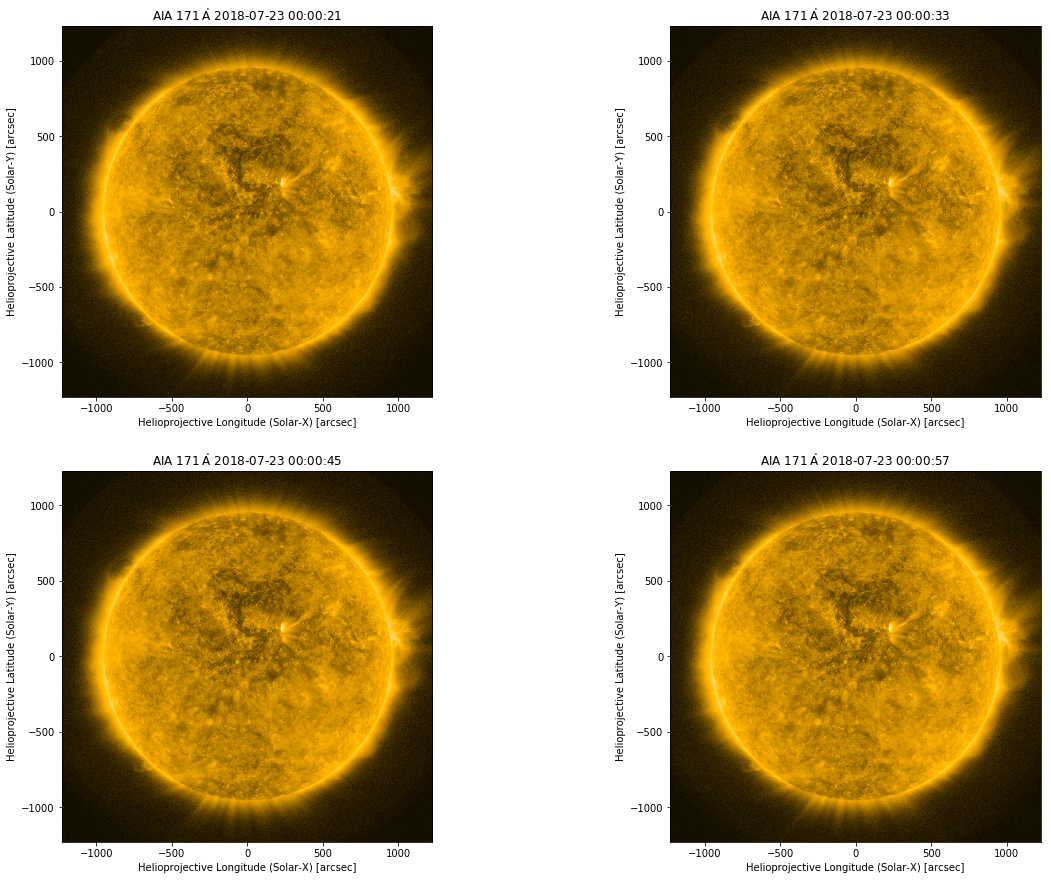

In [195]:
plt.figure(figsize=(20,15))
for i in range(len(qr)-1):
    ax = plt.subplot(2,2,i+1)
    smap = sunpy.map.Map(Files[i+1])
    smap.plot()
    

Información del Header de un archivo FITS almacenado en Files

In [196]:
hdu_list = fits.open(Files[0])
hdu_list.info()
image_data = hdu_list[0].data


Filename: AIA/aia_lev1_171a_2018_07_23t00_00_09_35z_image_lev1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 CompImageHDU    187   (4096, 4096)   int16   


# HMI

paginas de referencia que se están siqguiento 

http://nbviewer.jupyter.org/github/mbobra/calculating-spaceweather-keywords/blob/master/feature_extraction.ipynb
http://nbviewer.jupyter.org/github/mbobra/machine-learning-with-solar-data/blob/master/cme_svm.ipynb
http://hmi.stanford.edu/hminuggets/?p=1428
https://github.com/kbg
https://github.com/SolarDrew/freiburg-2017-02/tree/b9199dbfc7bc1018bea0989a3070c9360d15a923
http://jsoc.stanford.edu/HMI/HMI_observables.png
https://sdo.gsfc.nasa.gov/mission/instruments.php


+ EVE (Variability Experiment)
+ AIA (Atmospheric Imaging Assembly)

### aia

## Iris (Interface Region Imaging Spectrograph)





## SDO (Solar dynamic Observatory)

In [29]:
import numpy as np
import time
import matplotlib.pyplot as plt 
from datetime import datetime, timedelta
import astropy
from sunpy.net import vso 
import astropy.units as u
from sunpy.map import Map
from astropy.io import fits

In [65]:
dates = []
date_start = datetime(2012,7,1,0,0,0)
date_end = datetime(2012,7,3,23,59,59)
date_sample = 10
date_delta = (date_end-date_start)/date_sample
date_window = timedelta(minutes = 10.0)
temp_date = date_start
while temp_date < date_end:
    dates.append((str(temp_date),str(temp_date+date_window)))
    temp_date += date_delta

In [66]:
tstart, tend = dates[0][0], dates[0][1]

In [99]:
date_start

datetime.datetime(2012, 7, 1, 0, 0)

In [92]:
from sunpy.net import Fido, attrs as a
import astropy.units as u

Fido.search(a.Time('2012/3/4', '2012/3/6'),a.Instrument('lyra') | a.Instrument('rhessi'))

Start Time,End Time,Source,Instrument,Wavelength
str19,str19,str6,str4,str3
2012-03-04 00:00:00,2012-03-06 00:00:00,Proba2,lyra,nan
2012-03-04 00:00:00,2012-03-06 00:00:00,Proba2,lyra,nan
2012-03-04 00:00:00,2012-03-06 00:00:00,Proba2,lyra,nan
Start Time,End Time,Source,Instrument,Wavelength
str19,str19,str6,str6,str3
2012-03-04 00:00:00,2012-03-06 00:00:00,rhessi,rhessi,nan
2012-03-04 00:00:00,2012-03-06 00:00:00,rhessi,rhessi,nan


In [105]:
results = Fido.search(a.Time("2012/1/1", "2012/1/2"),
                      a.Instrument("lyra") | a.Instrument("eve"))
downloaded_files = Fido.fetch(results,path = "./dato_1.fits")

[                                        ========================================
[                                        ========================================


In [131]:
aia

lyra_20120101-000000_lev2_std.fits  lyra_20120102-000000_lev2_std.fits


In [216]:
Fido.search(a.Time("2012/1/1", "2012/1/20"),a.Instrument("lyra") | a.Instrument("aia"))

Start Time,End Time,Source,Instrument,Wavelength
str19,str19,str6,str4,str3
2012-01-01 00:00:00,2012-01-20 00:00:00,Proba2,lyra,nan
2012-01-01 00:00:00,2012-01-20 00:00:00,Proba2,lyra,nan
2012-01-01 00:00:00,2012-01-20 00:00:00,Proba2,lyra,nan
2012-01-01 00:00:00,2012-01-20 00:00:00,Proba2,lyra,nan
2012-01-01 00:00:00,2012-01-20 00:00:00,Proba2,lyra,nan
2012-01-01 00:00:00,2012-01-20 00:00:00,Proba2,lyra,nan
2012-01-01 00:00:00,2012-01-20 00:00:00,Proba2,lyra,nan
2012-01-01 00:00:00,2012-01-20 00:00:00,Proba2,lyra,nan
2012-01-01 00:00:00,2012-01-20 00:00:00,Proba2,lyra,nan


In [11]:
from __future__ import print_function, division
import astropy.units as u
from sunpy.net import Fido, attrs as a

In [34]:
attrs_time = a.Time('2005/01/01 00:10', '2005/01/01 00:15')
result = Fido.search(attrs_time, a.Instrument('rhessi'))
result

Start Time,End Time,Source,Instrument,Wavelength
str19,str19,str6,str6,str3
2005-01-01 00:10:00,2005-01-01 00:15:00,rhessi,rhessi,nan


In [20]:
downloaded_files = Fido.fetch(result)


[                                        ========================================


In [21]:
print(downloaded_files)


['/Users/macbookpro/sunpy/data/efz20050101.0.001210']


In [29]:
result = Fido.search(a.Time('2012/3/4', '2012/3/6'),
                     a.Instrument('aia'),
                     a.Wavelength(171*u.angstrom) | a.Wavelength(94*u.angstrom))

In [30]:
result

Start Time [1],End Time [1],Source,Instrument,Type,Wavelength [2]
,,,,,Angstrom
str19,str19,str3,str3,str8,float64
2012-03-05 15:39:25,2012-03-05 15:49:25,SDO,AIA,FULLDISK,171.0 .. 171.0
2012-03-05 03:59:26,2012-03-05 04:09:13,SDO,AIA,FULLDISK,171.0 .. 171.0
2012-03-04 03:09:36,2012-03-04 03:19:25,SDO,AIA,FULLDISK,171.0 .. 171.0
2012-03-04 22:49:36,2012-03-04 22:59:25,SDO,AIA,FULLDISK,171.0 .. 171.0
2012-03-05 06:19:26,2012-03-05 06:29:25,SDO,AIA,FULLDISK,171.0 .. 171.0
2012-03-05 00:59:25,2012-03-05 01:09:25,SDO,AIA,FULLDISK,171.0 .. 171.0
2012-03-05 10:39:36,2012-03-05 10:49:25,SDO,AIA,FULLDISK,171.0 .. 171.0
2012-03-04 22:09:36,2012-03-04 22:19:25,SDO,AIA,FULLDISK,171.0 .. 171.0


In [39]:
from sunpy.net import vso
client = vso.VSOClient()
qr = client.query(vso.attrs.Time('2001/1/1', '2001/1/2'), vso.attrs.Instrument('eit'))

/Users/macbookpro/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SunpyDeprecationWarning: The query function is deprecated and may be removed in a future version.
        Use VSOClient.search instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
help(vso.attrs.Instrument)

Help on class Instrument in module sunpy.net.vso.attrs:

class Instrument(_VSOSimpleAttr)
 |  Specifies the Instrument name for the search.
 |  
 |  Parameters
 |  ----------
 |  value : string
 |  
 |  Notes
 |  -----
 |  More information about each instrument supported by the VSO may be found
 |  within the VSO Registry. For a list of instruments see
 |  http://sdac.virtualsolar.org/cgi/show_details?keyword=INSTRUMENT.
 |  
 |  Method resolution order:
 |      Instrument
 |      _VSOSimpleAttr
 |      sunpy.net.attr.Attr
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, value)
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from _VSOSimpleAttr:
 |  
 |  __repr__(self)
 |  
 |  collides(self, other)
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from sunpy.net.attr.Attr:
 |  
 |  __and__(self, other)
 |  
 |  __eq__(self, other)
 |  
 |  __hash__

In [105]:
np.shape(np.random.rand(2, 25))

(2, 25)